In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
#To remove warnings
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import shap

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


In [5]:
#Getting the year from the 'date' column
df['list_year']=df['date'].str.split(pat='-',expand=True)[0]
#Converting the data to integer type, as date was stored as string
df['list_year']=df['list_year'].astype(int)

In [6]:
df['list_year'].nunique()

1

In [7]:
#Getting the month from the 'date' column
df['list_month'] = df['date'].str.split(pat='-',expand=True)[1]
df['list_month'] = df['list_month'].astype(int)

In [8]:
df['list_month'].nunique()

3

In [9]:
df['list_month'].unique()

array([5, 6, 7])

In [10]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'list_year', 'list_month'],
      dtype='object')

In [11]:
df['price'].corr(df['list_month'])

0.041081128107244035

In [12]:
df['price'].corr(df['list_year'])


nan

In [13]:
#Converting to datetime format to perfrom operations
df['Dates'] = pd.to_datetime(df['date'])

In [14]:
df['Dates']

0      2014-05-02
1      2014-05-02
2      2014-05-02
3      2014-05-02
4      2014-05-02
          ...    
4595   2014-07-09
4596   2014-07-09
4597   2014-07-09
4598   2014-07-10
4599   2014-07-10
Name: Dates, Length: 4600, dtype: datetime64[ns]

In [15]:
#Getting max date
max_date = df['Dates'].max()
max_date

Timestamp('2014-07-10 00:00:00')

In [16]:
#To get number of days between 2 dates
df['days_listed'] = (max_date-(df['Dates'])).dt.days

In [17]:
df['days_listed'].unique()

array([69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53,
       52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36,
       35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19,
       18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1,  0], dtype=int64)

In [18]:
df['days_listed'].nunique()

70

In [19]:
df['price'].corr(df['days_listed'])

-0.03390568727330368

In [20]:
#Describing the price when the days_listed is 1
df[df['days_listed']==1]['price'].describe()

count    1.210000e+02
mean     5.657632e+05
std      3.676894e+05
min      1.371240e+05
25%      3.355000e+05
50%      5.250000e+05
75%      6.600000e+05
max      2.680000e+06
Name: price, dtype: float64

In [21]:
df[df['days_listed']>=10]['price'].describe()

count    3.947000e+03
mean     5.416320e+05
std      4.169007e+05
min      0.000000e+00
25%      3.200000e+05
50%      4.575000e+05
75%      6.500000e+05
max      1.289900e+07
Name: price, dtype: float64

In [22]:
df[df['days_listed']<=10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,list_year,list_month,Dates,days_listed
3627,2014-06-30 00:00:00,7.800000e+05,4.0,2.50,3500,7048,2.0,0,0,3,...,2005,0,8906-8914 236th Ave NE,Redmond,WA 98053,USA,2014,6,2014-06-30,10
3628,2014-06-30 00:00:00,2.500000e+05,3.0,2.00,1440,9220,1.0,0,0,3,...,1965,1993,25816 13th Pl S,Des Moines,WA 98198,USA,2014,6,2014-06-30,10
3629,2014-06-30 00:00:00,1.200000e+06,4.0,2.00,2120,3360,2.0,0,0,3,...,1905,2010,420 17th Ave E,Seattle,WA 98112,USA,2014,6,2014-06-30,10
3630,2014-06-30 00:00:00,9.350000e+05,2.0,2.50,1780,2067,2.0,0,0,5,...,1974,0,223 98th Ave NE,Bellevue,WA 98004,USA,2014,6,2014-06-30,10
3631,2014-06-30 00:00:00,3.000000e+05,2.0,1.00,960,8153,1.0,0,0,3,...,1947,2012,2610 NE 145th St,Shoreline,WA 98155,USA,2014,6,2014-06-30,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,7,2014-07-09,1
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,7,2014-07-09,1
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,7,2014-07-09,1
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,7,2014-07-10,0


In [23]:
l=[0,1,2,3,4,5,6]

<AxesSubplot:xlabel='days_listed', ylabel='price'>

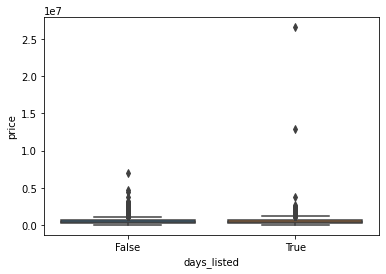

In [24]:
#Boxplot to check the variation
sns.boxplot(x=df['days_listed']<=20,y=df['price'])

In [25]:
df[df['days_listed']<=10]['price'].describe()

count    7.290000e+02
mean     6.125045e+05
std      1.038440e+06
min      0.000000e+00
25%      3.345000e+05
50%      4.864458e+05
75%      6.790000e+05
max      2.659000e+07
Name: price, dtype: float64

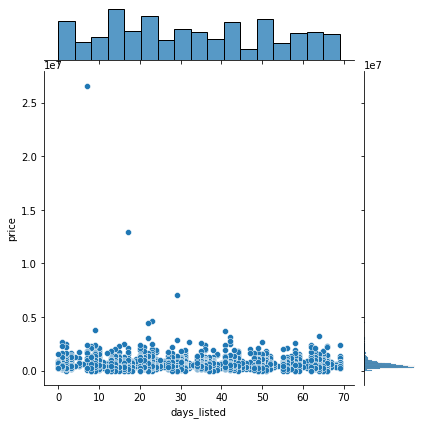

In [26]:
#Making jointplot to check the variation in prices based on the days_listed
sns.jointplot(x='days_listed',y='price',data=df)

In [27]:
df[df['days_listed']<=10]['price'].quantile(0.95)

1284999.9999980002

In [28]:
#Dividing into bins of size 10 and finding the 95th percentile for the same
df[(df['days_listed']<=10) & (df['days_listed']<=20)]['price'].quantile(0.95)

1284999.9999980002

In [29]:
df[df['days_listed']<=20]['price'].quantile(0.95)

1202250.0000000002

In [30]:
df[df['days_listed']>=10]['price'].quantile(0.95)

1157340.0

In [31]:
df[df['days_listed']>=35]['price'].quantile(0.95)

1125550.0

In [32]:
df[df['days_listed']<=35]['price'].quantile(0.95)

1200000.0

In [33]:
df[df['days_listed']>=10]['price'].quantile(0.95)

1157340.0

In [34]:
#To get the number of houses in each city
number_of_houses = pd.DataFrame(df.groupby(df['city']).size()).reset_index()
number_of_houses.columns=['city','listings']
number_of_houses

,city,listings
0,Algona,5
1,Auburn,176
2,Beaux Arts Village,1
3,Bellevue,286
4,Black Diamond,9
5,Bothell,33
6,Burien,74
7,Carnation,22
8,Clyde Hill,11
9,Covington,43


In [35]:
#Merging the number of listings
new_df = pd.merge(df,number_of_houses,on='city')
#Displaying all the columns
pd.set_option('display.max_columns', None)
new_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,list_year,list_month,Dates,days_listed,listings
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2014-05-02,69,123
1,2014-05-02 00:00:00,625000.0,4.0,2.50,2820,8408,2.0,0,0,3,2820,0,2014,0,17052 4th Ave NE,Shoreline,WA 98155,USA,2014,5,2014-05-02,69,123
2,2014-05-02 00:00:00,308500.0,2.0,1.00,850,6174,1.0,0,0,4,850,0,1950,1983,121 NE 147th St,Shoreline,WA 98155,USA,2014,5,2014-05-02,69,123
3,2014-05-05 00:00:00,400000.0,2.0,1.75,2110,9519,1.0,0,0,2,2110,0,1948,0,2120 NE 168th St,Shoreline,WA 98155,USA,2014,5,2014-05-05,66,123
4,2014-05-05 00:00:00,379950.0,4.0,1.75,1970,9389,1.0,0,0,5,1140,830,1960,0,1701 N 204th Pl,Shoreline,WA 98133,USA,2014,5,2014-05-05,66,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-05-28 00:00:00,745000.0,3.0,1.75,1490,9800,1.0,0,0,4,1140,350,1947,1988,10637 SE 29th St,Beaux Arts Village,WA 98004,USA,2014,5,2014-05-28,43,1
4596,2014-06-02 00:00:00,439900.0,2.0,2.00,1410,12282,1.5,0,0,5,1410,0,1909,1988,31103 SE 85th Pl,Preston,WA 98050,USA,2014,6,2014-06-02,38,2
4597,2014-06-05 00:00:00,685000.0,3.0,2.75,3150,219978,2.0,0,0,4,3000,150,1990,0,5424 298th Ave SE,Preston,WA 98050,USA,2014,6,2014-06-05,35,2
4598,2014-06-06 00:00:00,320000.0,3.0,1.75,1370,9900,1.0,0,0,4,1370,0,1983,0,99 17th Ave,Milton,WA 98354,USA,2014,6,2014-06-06,34,2


In [36]:
new_df['price'].corr(new_df['listings'])

0.04184340030161778

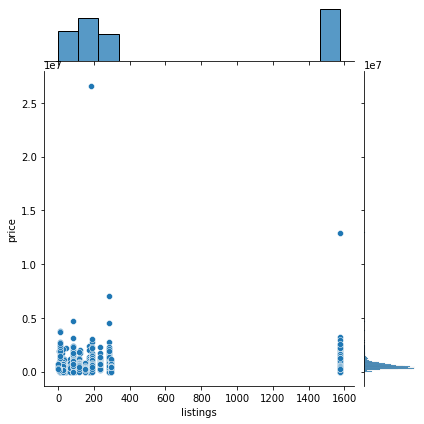

In [37]:
sns.jointplot(x='listings',y='price',data=new_df)

In [38]:
#Finding the time after renovation and building
new_df['time_renovated'] = new_df['list_year']-new_df['yr_renovated']
new_df['time_built'] = new_df['list_year']-new_df['yr_built']
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,list_year,list_month,Dates,days_listed,listings,time_renovated,time_built
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,5,2014-05-02,69,123,9,59
1,2014-05-02 00:00:00,625000.0,4.0,2.50,2820,8408,2.0,0,0,3,2820,0,2014,0,17052 4th Ave NE,Shoreline,WA 98155,USA,2014,5,2014-05-02,69,123,2014,0
2,2014-05-02 00:00:00,308500.0,2.0,1.00,850,6174,1.0,0,0,4,850,0,1950,1983,121 NE 147th St,Shoreline,WA 98155,USA,2014,5,2014-05-02,69,123,31,64
3,2014-05-05 00:00:00,400000.0,2.0,1.75,2110,9519,1.0,0,0,2,2110,0,1948,0,2120 NE 168th St,Shoreline,WA 98155,USA,2014,5,2014-05-05,66,123,2014,66
4,2014-05-05 00:00:00,379950.0,4.0,1.75,1970,9389,1.0,0,0,5,1140,830,1960,0,1701 N 204th Pl,Shoreline,WA 98133,USA,2014,5,2014-05-05,66,123,2014,54


In [39]:
#Replacing the time_renovated values with time_built values if no renovation done
new_df['time_renovated'][new_df['time_renovated']==2014]=new_df['time_built']

In [40]:
new_df['price'].corr(new_df['time_built'])

-0.021856830395478994

In [41]:
new_df['price'].corr(new_df['time_renovated'])

-0.002289390872013728

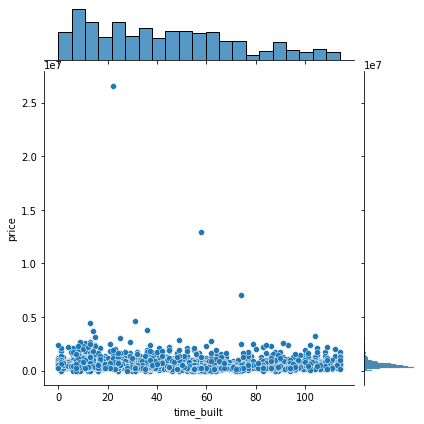

In [42]:
sns.jointplot(x='time_built',y='price',data=new_df)

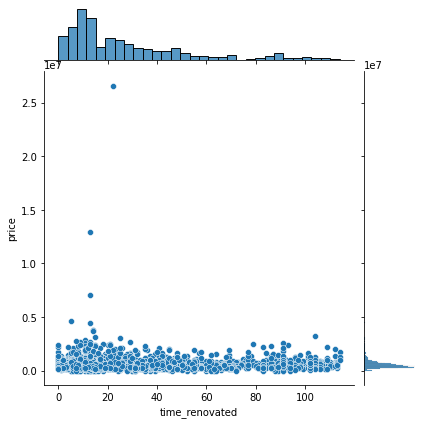

In [43]:
sns.jointplot(x='time_renovated',y='price',data=new_df)

In [44]:
new_df['time_renovated'].nunique()

111

In [45]:
new_df['time_renovated'].unique()

array([  9,   0,  31,  66,  54,  10,  14,  11,  58,  13,  62,   5,  35,
        55,  63,   6,  29,  61,  20,   7,  69,  46,  92,   1,  32,  26,
        59,  34,  16,  15,  45,  39,  25,  21,   2,  50,  49,  64,  17,
        51,  41,  22,  68,  56,  52,  42,   3,  19,  91,  93,   4,  70,
        65,  85,  72, 106,   8,  43, 112,  84,  44,  28,  76,  18,  86,
       111,  12, 104, 110,  24,  36,  94,  97, 109,  89,  96,  73, 102,
        88,  71,  78,  33,  30,  87,  83,  77,  40,  82,  27, 113, 108,
        60,  74, 107,  99,  75,  57,  98,  80,  90,  79,  48,  67,  38,
        53,  23,  37, 114, 101,  81,  47], dtype=int64)

In [46]:
new_df[new_df['time_renovated']<=10]['price'].describe()

count    1.240000e+03
mean     5.362349e+05
std      3.327080e+05
min      0.000000e+00
25%      3.338725e+05
50%      4.550000e+05
75%      6.298500e+05
max      4.668000e+06
Name: price, dtype: float64

In [47]:
new_df[new_df['time_renovated']>10]['price'].describe()

count    3.360000e+03
mean     5.577674e+05
std      6.279430e+05
min      0.000000e+00
25%      3.150000e+05
50%      4.640000e+05
75%      6.600000e+05
max      2.659000e+07
Name: price, dtype: float64

In [48]:
new_df[new_df['time_renovated']<=10]['price'].quantile(0.95)

1080000.0

In [49]:
new_df[new_df['time_renovated']>10]['price'].quantile(0.95)

1212624.9999999993

In [50]:
new_df[new_df['time_renovated']<=20]['price'].quantile(0.95)

1199899.9999999995

In [51]:
new_df[new_df['time_renovated']>20]['price'].quantile(0.95)

1151110.0000000007

In [52]:
new_df['time_renovated'].max()

114

In [53]:
new_df['time_renovated'].min()

0

In [54]:
new_df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'list_year', 'list_month', 'Dates',
       'days_listed', 'listings', 'time_renovated', 'time_built'],
      dtype='object')

In [55]:
new_df['city']=pd.factorize(new_df['city'])[0]
new_df['country']=pd.factorize(new_df['city'])[0]

In [56]:
num = new_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition','yr_built', 'yr_renovated', 'city','country',
       'days_listed', 'listings', 'time_renovated', 'time_built']]

In [57]:
num.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,city,country,days_listed,listings,time_renovated,time_built
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.021857,-0.028774,-0.033270,-0.033270,-0.033906,0.041843,-0.002289,-0.021857
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.142461,-0.061082,0.090115,0.090115,-0.005762,-0.177111,-0.026499,-0.142461
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.463498,-0.215886,0.081377,0.081377,-0.019263,-0.175516,-0.170196,-0.463498
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.287775,-0.122817,0.134670,0.134670,-0.029481,-0.225192,-0.099957,-0.287775
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.050706,-0.022730,0.197614,0.197614,0.020393,-0.200048,-0.029112,-0.050706
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.467481,-0.233996,-0.008700,-0.008700,-0.029607,0.026203,-0.187006,-0.467481
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,-0.023563,0.008625,0.082089,0.082089,-0.017586,-0.044328,0.008190,0.023563
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,-0.064465,0.022967,0.019511,0.019511,-0.005844,0.047593,0.023304,0.064465
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.399698,-0.186818,-0.033943,-0.033943,-0.007853,0.077362,0.514397,0.399698
yr_built,0.021857,0.142461,0.463498,0.287775,0.050706,0.467481,-0.023563,-0.064465,-0.399698,1.000000,-0.321342,0.233365,0.233365,-0.001356,-0.439420,-0.460791,-1.000000


In [58]:
new_df.drop(['list_year','list_month','date'],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Dates,days_listed,listings,time_renovated,time_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,0,WA 98133,0,2014-05-02,69,123,9,59
1,625000.0,4.0,2.50,2820,8408,2.0,0,0,3,2820,0,2014,0,17052 4th Ave NE,0,WA 98155,0,2014-05-02,69,123,0,0
2,308500.0,2.0,1.00,850,6174,1.0,0,0,4,850,0,1950,1983,121 NE 147th St,0,WA 98155,0,2014-05-02,69,123,31,64
3,400000.0,2.0,1.75,2110,9519,1.0,0,0,2,2110,0,1948,0,2120 NE 168th St,0,WA 98155,0,2014-05-05,66,123,66,66
4,379950.0,4.0,1.75,1970,9389,1.0,0,0,5,1140,830,1960,0,1701 N 204th Pl,0,WA 98133,0,2014-05-05,66,123,54,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,745000.0,3.0,1.75,1490,9800,1.0,0,0,4,1140,350,1947,1988,10637 SE 29th St,41,WA 98004,41,2014-05-28,43,1,26,67
4596,439900.0,2.0,2.00,1410,12282,1.5,0,0,5,1410,0,1909,1988,31103 SE 85th Pl,42,WA 98050,42,2014-06-02,38,2,26,105
4597,685000.0,3.0,2.75,3150,219978,2.0,0,0,4,3000,150,1990,0,5424 298th Ave SE,42,WA 98050,42,2014-06-05,35,2,24,24
4598,320000.0,3.0,1.75,1370,9900,1.0,0,0,4,1370,0,1983,0,99 17th Ave,43,WA 98354,43,2014-06-06,34,2,31,31


In [59]:
new_df['price'].corr(new_df['city'])

-0.03327044099439863

First try with single values, in order to check if the GridSearchCV is working or not. Then provide arrays for those parameters(np.arange())

In [60]:
#  rf_grid = {"n_estimators": np.arange(50, 150, 50),
#             "max_depth": [3,5],
#             "min_samples_split": np.arange(2, 10, 1),
#             "min_samples_leaf": np.arange(1, 10, 1),
#             }

# # Instantiate GridSearchCV model and since we are using regression, we use mean_squared_error as it is calculated from actual and predicted values
#  rs_model = GridSearchCV(RandomForestRegressor(),
#                              rf_grid,                            
#                                cv=5,scoring='neg_mean_squared_error',
#                                verbose=True)
#  # fit
#  rs_model.fit(X, y)

In [61]:
# rs_model.best_params_
# rs_model.best_score_
# rs_model.best_estimator_

In [62]:
# rs_model.best_params_

In [63]:
# rs_model.best_score_

In [64]:
# sns.pairplot(data=Train,hue='price')

In [65]:
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,list_year,list_month,Dates,days_listed,listings,time_renovated,time_built
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,0,WA 98133,0,2014,5,2014-05-02,69,123,9,59
1,2014-05-02 00:00:00,625000.0,4.0,2.50,2820,8408,2.0,0,0,3,2820,0,2014,0,17052 4th Ave NE,0,WA 98155,0,2014,5,2014-05-02,69,123,0,0
2,2014-05-02 00:00:00,308500.0,2.0,1.00,850,6174,1.0,0,0,4,850,0,1950,1983,121 NE 147th St,0,WA 98155,0,2014,5,2014-05-02,69,123,31,64
3,2014-05-05 00:00:00,400000.0,2.0,1.75,2110,9519,1.0,0,0,2,2110,0,1948,0,2120 NE 168th St,0,WA 98155,0,2014,5,2014-05-05,66,123,66,66
4,2014-05-05 00:00:00,379950.0,4.0,1.75,1970,9389,1.0,0,0,5,1140,830,1960,0,1701 N 204th Pl,0,WA 98133,0,2014,5,2014-05-05,66,123,54,54


X.head()

In [66]:
new_df = new_df.drop(new_df[(new_df['price'] == 0)].index)

In [67]:
new_df.shape

(4551, 25)

In [68]:
X_new = new_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition',
       'yr_built','days_listed', 'listings','city']]
y_new = new_df['price']

In [69]:
X_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,days_listed,listings,city
0,3.0,1.50,1340,7912,1.5,0,0,3,1955,69,123,0
1,4.0,2.50,2820,8408,2.0,0,0,3,2014,69,123,0
2,2.0,1.00,850,6174,1.0,0,0,4,1950,69,123,0
3,2.0,1.75,2110,9519,1.0,0,0,2,1948,66,123,0
4,4.0,1.75,1970,9389,1.0,0,0,5,1960,66,123,0


In [70]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.2)

In [71]:
lin_reg = LinearRegression()
lin_reg_model_new = lin_reg.fit(X_train_new,y_train_new)

In [72]:
lin_reg_model_new.score(X_test_new,y_test_new)

0.587151815640863

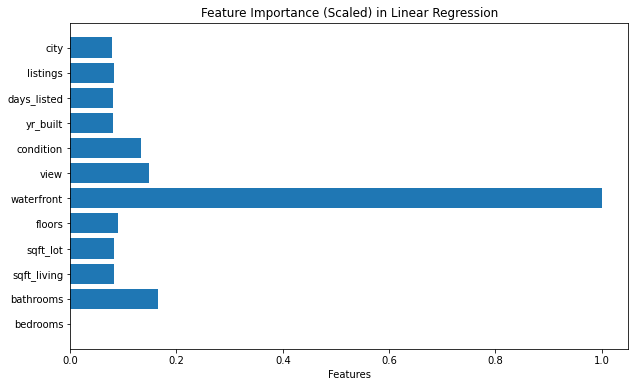

        Feature  Scaled Importance
0      bedrooms           0.000000
1     bathrooms           0.164463
2   sqft_living           0.082166
3      sqft_lot           0.081763
4        floors           0.089501
5    waterfront           1.000000
6          view           0.147806
7     condition           0.133244
8      yr_built           0.079843
9   days_listed           0.080833
10     listings           0.081871
11         city           0.079449


In [73]:
#For feature importance in linear regression model

#Getting the importance of all the features
feature_importance = lin_reg_model_new.coef_

# Create a DataFrame to store feature names and their importance
feature_names = X_new.columns.to_list()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Scale the importance values between 0 and 1 using Min-Max scaling
scaler = MinMaxScaler()
importance_df['Scaled Importance'] = scaler.fit_transform(importance_df[['Importance']])

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Scaled Importance'])
plt.xlabel('Scaled Importance (0 to 1)')
plt.xlabel('Features')
plt.title('Feature Importance (Scaled) in Linear Regression')
plt.show()

#For writing labels in slanting
# plt.xticks(rotation=45)
print(pd.merge(importance_df['Feature'],importance_df['Scaled Importance'],left_index=True,right_index=True))

In [74]:
joblib.dump(lin_reg_model_new,'lin_reg_model_final.joblib')

['lin_reg_model_final.joblib']

In [75]:
 forest_reg = RandomForestRegressor(
   max_depth= 4,
 min_samples_leaf= 3,
 min_samples_split= 3,
 n_estimators= 101,
    criterion = "absolute_error",
    max_features = 10,
    max_leaf_nodes = 25,
    # random_state=43
 )
forest_reg_model_new = forest_reg.fit(X_train_new,y_train_new)
forest_reg_model_new.score(X_test_new,y_test_new)

0.6019833887227495

                    0
bedrooms     0.000199
floors       0.000391
days_listed  0.000843
waterfront   0.002661
condition    0.002699
sqft_lot     0.005181
view         0.010942
yr_built     0.018416
bathrooms    0.051240
city         0.098976
listings     0.156706
sqft_living  0.651748


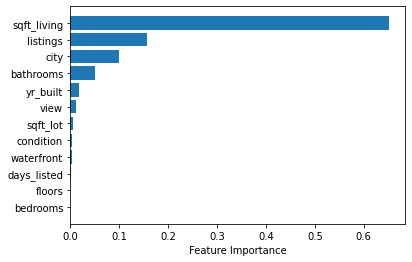

In [76]:
#Feature importance in order to analyse the input features
sort = forest_reg_model_new.feature_importances_.argsort()
plt.barh(X_new.columns[sort], forest_reg_model_new.feature_importances_[sort])
plt.xlabel("Feature Importance")
print(pd.DataFrame(forest_reg_model_new.feature_importances_[sort],X_new.columns[sort]))

In [77]:
#Getting the shap values for post model analysis
explainer = shap.Explainer(forest_reg_model_new, X_new)
shap_values = explainer(X_new)
shap_values

.values =
array([[-1.65346533e+01, -1.04157346e+04, -1.73511238e+05, ...,
         1.21278872e+02, -8.67262372e+04,  6.92932255e+03],
       [-2.48019775e+01, -4.60547938e+03,  1.28984229e+05, ...,
         7.03052783e+01, -8.79216020e+04, -2.48561528e+03],
       [-1.65346533e+01, -1.23543941e+04, -1.90910504e+05, ...,
         1.21278872e+02, -7.07200435e+04,  7.00252388e+03],
       ...,
       [-2.48019775e+01,  6.68076276e+03,  2.02179770e+05, ...,
         1.75198027e+02, -4.40391969e+04,  1.10457448e+04],
       [-2.48019775e+01, -6.78779165e+03, -1.73580869e+05, ...,
         1.75198027e+02, -4.64662238e+04, -2.21095649e+04],
       [-2.48019775e+01, -6.66842591e+03, -1.88212255e+05, ...,
         1.25734321e+02, -3.73703666e+04, -2.09709576e+04]])

.base_values =
array([541015.17653541, 541015.17653541, 541015.17653541, ...,
       541015.17653541, 541015.17653541, 541015.17653541])

.data =
array([[3.00e+00, 1.50e+00, 1.34e+03, ..., 6.90e+01, 1.23e+02, 0.00e+00],
       [4.00

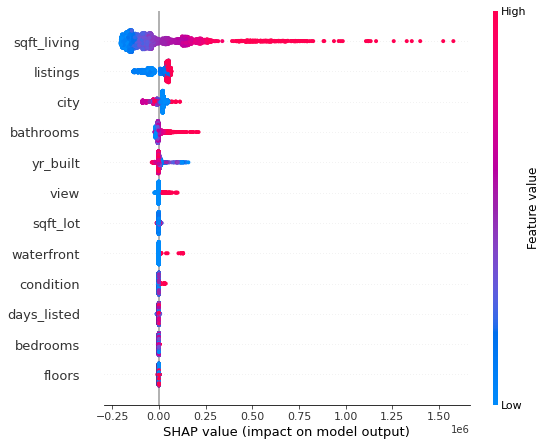

In [78]:
#Making a summary plot to display the analysis of shap
shap.initjs()
shap_explainer = shap.TreeExplainer(forest_reg_model_new)
shap_values = shap_explainer.shap_values(X_new)
shap.summary_plot(shap_values, X_new)

In [79]:
joblib.dump(forest_reg_model_new,'forest_reg_model_final.joblib')

['forest_reg_model_final.joblib']

In [80]:
decision_tree = DecisionTreeRegressor(
    max_depth= 7,
    min_samples_leaf= 3,
    min_samples_split= 3,
    criterion = "absolute_error",
    max_features = 10,
    max_leaf_nodes = 25,
    # random_state=43
)
decision_tree_model_new = decision_tree.fit(X_train_new,y_train_new)
decision_tree_model_new.score(X_test_new,y_test_new)

0.5757275831103206

                    0
bedrooms     0.000000
bathrooms    0.000000
sqft_lot     0.000000
floors       0.000000
waterfront   0.000000
view         0.000000
condition    0.000000
days_listed  0.000000
yr_built     0.039855
city         0.114271
listings     0.202585
sqft_living  0.643288


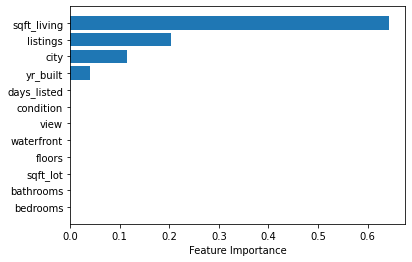

In [81]:
#Feature importance in order to analyse the input features
sort = decision_tree_model_new.feature_importances_.argsort()
plt.barh(X_new.columns[sort], decision_tree_model_new.feature_importances_[sort])
plt.xlabel("Feature Importance")
print(pd.DataFrame(decision_tree_model_new.feature_importances_[sort],X_new.columns[sort]))

In [82]:
#Getting the shap values for post model analysis
explainer = shap.Explainer(decision_tree_model_new, X_new)
shap_values = explainer(X_new)
shap_values

.values =
array([[ 0.00000000e+00,  0.00000000e+00, -2.09542810e+05, ...,
         0.00000000e+00, -9.86861413e+04,  1.42695898e+02],
       [ 0.00000000e+00,  0.00000000e+00,  6.11138606e+04, ...,
         0.00000000e+00, -1.02575342e+05, -1.21643648e+03],
       [ 0.00000000e+00,  0.00000000e+00, -2.37531144e+05, ...,
         0.00000000e+00, -6.95944744e+04, -9.60637422e+02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  2.06137052e+05, ...,
         0.00000000e+00,  7.23254688e+03, -5.01453372e+04],
       [ 0.00000000e+00,  0.00000000e+00, -2.12209281e+05, ...,
         0.00000000e+00, -4.86417925e+04, -2.74246698e+04],
       [ 0.00000000e+00,  0.00000000e+00, -2.23371788e+05, ...,
         0.00000000e+00, -5.32017884e+04, -1.17021703e+04]])

.base_values =
array([560087.68, 560087.68, 560087.68, ..., 560087.68, 560087.68,
       560087.68])

.data =
array([[3.00e+00, 1.50e+00, 1.34e+03, ..., 6.90e+01, 1.23e+02, 0.00e+00],
       [4.00e+00, 2.50e+00, 2.82e+03, ..., 6.90e

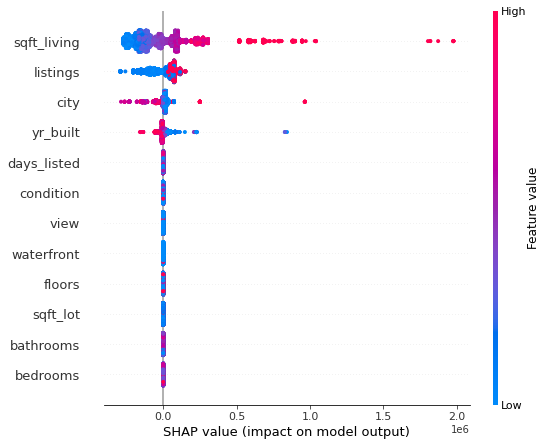

In [83]:
#Making a summary plot to display the analysis of shap
shap.initjs()
shap_explainer = shap.TreeExplainer(decision_tree_model_new)
shap_values = shap_explainer.shap_values(X_new)
shap.summary_plot(shap_values, X_new)

In [84]:
joblib.dump(decision_tree_model_new,'decision_tree_model_final.joblib')

['decision_tree_model_final.joblib']

In [85]:
xgb = XGBRegressor()
xgb_model = xgb.fit(X_train_new,y_train_new)
xgb_model.score(X_test_new,y_test_new)

0.5699587800445498

                    0
floors       0.010479
bedrooms     0.021279
yr_built     0.026594
sqft_lot     0.029944
bathrooms    0.035223
view         0.037314
city         0.043911
condition    0.103922
listings     0.107203
sqft_living  0.184462
days_listed  0.198575
waterfront   0.201094


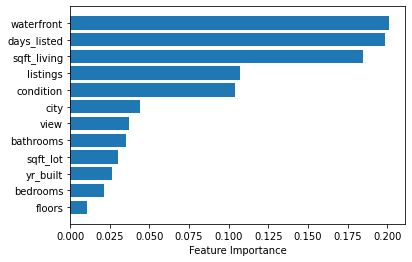

In [86]:
#Feature importance in order to analyse the input features
sort = xgb_model.feature_importances_.argsort()
plt.barh(X_new.columns[sort], xgb_model.feature_importances_[sort])
plt.xlabel("Feature Importance")
print(pd.DataFrame(xgb_model.feature_importances_[sort],X_new.columns[sort]))

In [87]:
#Getting the shap values for post model analysis
explainer = shap.Explainer(xgb_model, X_new)
shap_values = explainer(X_new)
shap_values

 93%|=================== | 4251/4551 [00:13<00:00]       

.values =
array([[  12111.91476738,  -10926.13529236, -150915.45928368, ...,
            608.9407653 ,  -50387.06365555,   13782.40670044],
       [  -7693.41657967,   17763.81140541,   68686.69385975, ...,
          30637.28314262,  -99620.23399467,   29071.37194046],
       [  20204.98752556,  -95799.15302094,  -74461.8458736 , ...,
          27673.12731026,  -32486.3477388 ,   10664.62900513],
       ...,
       [  17708.8871022 ,  -14240.27145714,  188726.72207749, ...,
          22506.41819016,  118119.05992294,   -8518.13169197],
       [  21301.5035363 ,   -3268.04268555, -151580.62381813, ...,
          50510.42874908,  243955.69937706,    5635.44895126],
       [  18470.69254776,   24979.24954819,   80248.1808886 , ...,
          32149.11691872,  344939.94758708, -429715.10086777]])

.base_values =
array([550304.78155637, 550304.78155637, 550304.78155637, ...,
       550304.78155637, 550304.78155637, 550304.78155637])

.data =
array([[3.00e+00, 1.50e+00, 1.34e+03, ..., 6.90e+0

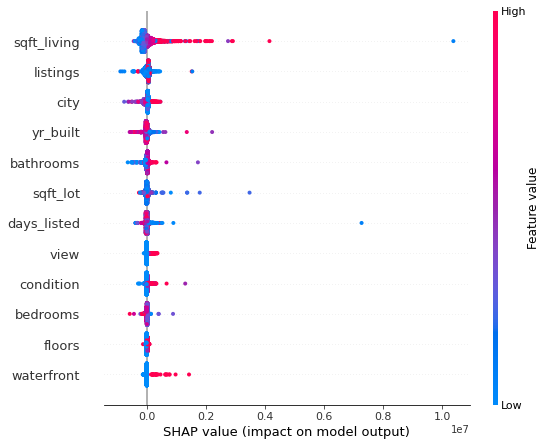

In [88]:
#Making a summary plot to display the analysis of shap
shap.initjs()
shap_explainer = shap.TreeExplainer(xgb_model)
shap_values = shap_explainer.shap_values(X_new)
shap.summary_plot(shap_values, X_new)